# Compare all jobs

Test base

Comparison plot saved to: component/finalResult/3_scheduling_metrics_comparison_plot_circuit.png


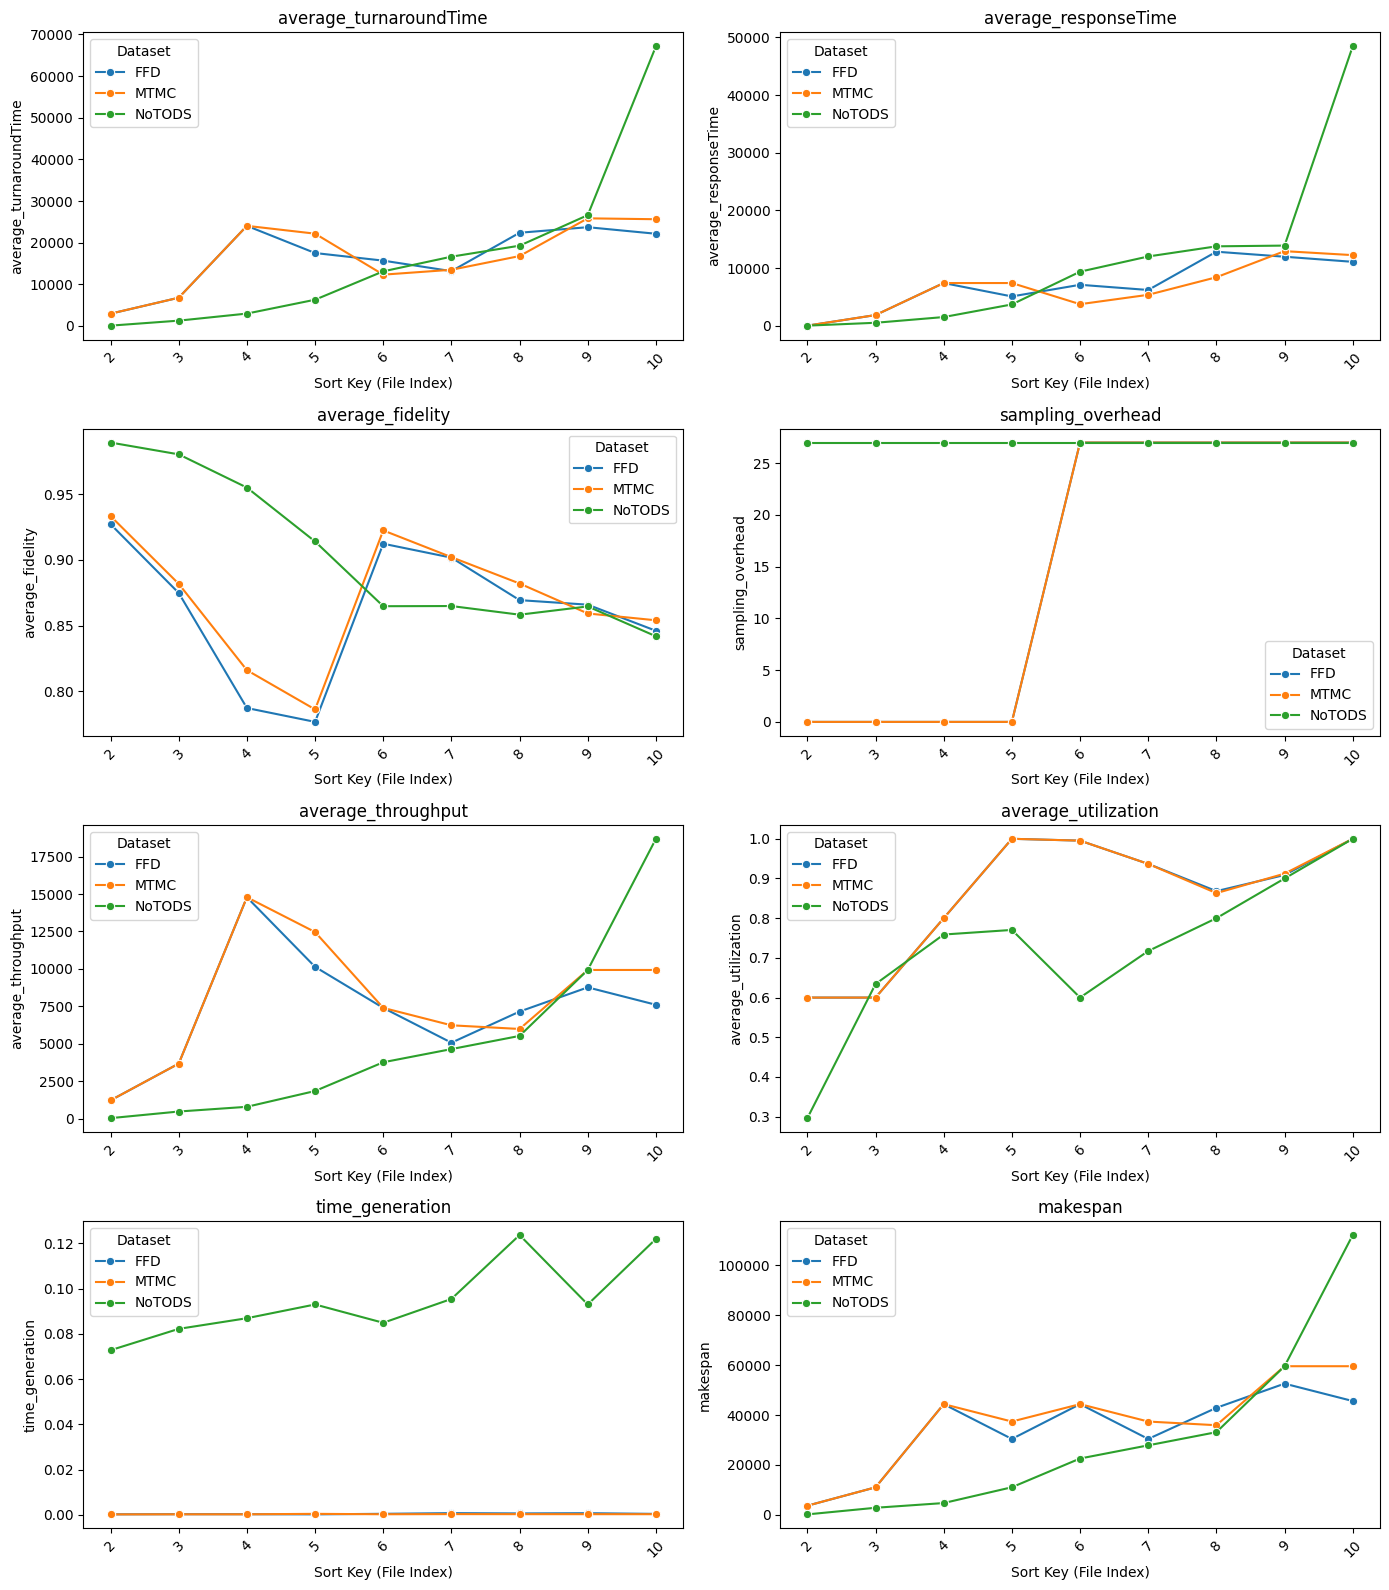

In [ ]:
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import math

# Define folders for the datasets
folder_paths = {
    "FFD": os.path.join("component", "finalResult", "5_5", "FFD", "ghz"),
    # "MILQ_extend": os.path.join("component", "finalResult",  "5_5", "MILQ_extend", "ghz"),
    "NoTODS": os.path.join("component", "finalResult",  "5_5", "NoTODS", "ghz"),
    "MTMC": os.path.join("component", "finalResult",  "5_5", "MTMC", "ghz"),

}
num_circuit = 3

# Regex pattern to match filenames like 3_0.0_0.json to 3_6.0_0.json
pattern = re.compile(rf"{num_circuit}_([0-9]|10)\.0_0\.json")

# Metrics to extract from each JSON file
metrics = [
    "average_turnaroundTime",
    "average_responseTime",
    "average_fidelity",
    "sampling_overhead",
    "average_throughput",
    "average_utilization",
    "time_generation",
    "makespan"
]

# Read data from all datasets
data = []
for dataset_name, folder_path in folder_paths.items():
    for file in os.listdir(folder_path):
        if pattern.match(file):
            with open(os.path.join(folder_path, file), "r") as f:
                content = json.load(f)
                entry = {metric: content.get(metric, None) for metric in metrics}  # Use .get() to avoid KeyErrors
                entry["filename"] = file
                entry["dataset"] = dataset_name  # Add dataset name
                data.append(entry)

if not data:
    print("No matching files found in any folder. Please check the folders and regex pattern.")
    exit()

# Convert data to a pandas DataFrame
df = pd.DataFrame(data)

# Sort by numeric order based on the filename
df["sort_key"] = df["filename"].str.extract(rf"{num_circuit}_(\d+)\.0_0\.json")[0].astype(int)
df = df.sort_values(by=["sort_key", "dataset"])

# Create subplots for each metric
num_rows = math.ceil(len(metrics) / 2)  # Calculate required rows
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 4))  # Adjust height dynamically
axes = axes.flatten()  # Flatten axes for easy iteration

for i, metric in enumerate(metrics):
    sns.lineplot(ax=axes[i], data=df, x="sort_key", y=metric, hue="dataset", marker="o")
    axes[i].set_title(metric)
    axes[i].set_xlabel("Sort Key (File Index)")
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    axes[i].legend(title="Dataset")
    
# Hide any unused subplots
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and save to PDF
plt.tight_layout()
pdf_output_path = os.path.join("component", "finalResult", f"{num_circuit}_scheduling_metrics_comparison_plot_circuit.pdf")

# Ensure the filename is unique if the file already exists
if os.path.exists(pdf_output_path):
    base_name, ext = os.path.splitext(pdf_output_path)
    counter = 1
    while os.path.exists(f"{base_name}_{counter}{ext}"):
        counter += 1
    pdf_output_path = f"{base_name}_{counter}{ext}"
plt.savefig(pdf_output_path)

print(f"Comparison plot saved to: {pdf_output_path}")

X axis increase by circuit

In [ ]:
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import math

# Define metrics to extract
metrics = [
    "average_turnaroundTime",
    "average_responseTime",
    "average_fidelity",
    "sampling_overhead",
    "average_throughput",
    "average_utilization",
    "time_generation",
    "makespan"
]

# Define folders for the datasets
folder_paths = {
    "FFD": os.path.join("component", "finalResult", "5_5", "FFD", "ghz"),
    "MILQ_extend": os.path.join("component", "finalResult",  "5_5", "MILQ_extend", "ghz"),
    "NoTODS": os.path.join("component", "finalResult",  "5_5", "NoTODS", "ghz"),
    "MTMC": os.path.join("component", "finalResult",  "5_5", "MTMC", "ghz"),
}

for num_circuit in range(2, 10):  # Loop through num_qubits values from 2 to 10
    # Regex pattern to match filenames like 2_0.0_0.json to 10_6.0_0.json
    pattern = re.compile(rf"{num_circuit}_(\d+)\.0_0\.json")

    # Read data from all datasets
    data = []
    for dataset_name, folder_path in folder_paths.items():
        for file in os.listdir(folder_path):
            if pattern.match(file):
                with open(os.path.join(folder_path, file), "r") as f:
                    content = json.load(f)
                    entry = {metric: content.get(metric, None) for metric in metrics}  # Use .get() to avoid KeyErrors
                    entry["filename"] = file
                    entry["dataset"] = dataset_name  # Add dataset name
                    data.append(entry)

    if not data:
        print(f"No matching files found for num_qubits={num_circuit}. Please check the folders and regex pattern.")
        continue

    # Convert data to a pandas DataFrame
    df = pd.DataFrame(data)

    # Extract num_qubits_each_circuit from filename
    df["num_qubits_each_circuit"] = df["filename"].str.extract(rf"{num_circuit}_(\d+)\.0_0\.json")[0].astype(int)

    # Sort by num_qubits_each_circuit and dataset
    df = df.sort_values(by=["num_qubits_each_circuit", "dataset"])

    # Create subplots for each metric
    num_rows = math.ceil(len(metrics) / 2)  # Calculate required rows
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 4))  # Adjust height dynamically
    axes = axes.flatten()  # Flatten axes for easy iteration

    for i, metric in enumerate(metrics):
        sns.lineplot(ax=axes[i], data=df, x="num_qubits_each_circuit", y=metric, hue="dataset", marker="o")
        axes[i].set_title(metric)
        axes[i].set_xlabel("Num Qubits per Batch")
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        axes[i].legend(title="Dataset")

    # Hide any unused subplots
    for j in range(len(metrics), len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout and save to pdf
    plt.tight_layout()
    output_path = os.path.join("component", "finalResult", "5_5",  f"{num_circuit}_circuits_scheduling_metrics_comparison_plot_circuit.pdf")

    # Ensure the filename is unique if the file already exists
    if os.path.exists(output_path):
        base_name, ext = os.path.splitext(output_path)
        counter = 1
        while os.path.exists(f"{base_name}_{counter}{ext}"):
            counter += 1
        output_path = f"{base_name}_{counter}{ext}"

    plt.savefig(output_path)
    plt.close()

    print(f"Comparison plot for num_circuit={num_circuit} saved to: {output_path}")


Comparison plot for num_circuit=2 saved to: component/finalResult/5_5/2_circuits_scheduling_metrics_comparison_plot_circuit_2.png
Comparison plot for num_circuit=3 saved to: component/finalResult/5_5/3_circuits_scheduling_metrics_comparison_plot_circuit_2.png
Comparison plot for num_circuit=4 saved to: component/finalResult/5_5/4_circuits_scheduling_metrics_comparison_plot_circuit_2.png
Comparison plot for num_circuit=5 saved to: component/finalResult/5_5/5_circuits_scheduling_metrics_comparison_plot_circuit_2.png
Comparison plot for num_circuit=6 saved to: component/finalResult/5_5/6_circuits_scheduling_metrics_comparison_plot_circuit_2.png
Comparison plot for num_circuit=7 saved to: component/finalResult/5_5/7_circuits_scheduling_metrics_comparison_plot_circuit_2.png
Comparison plot for num_circuit=8 saved to: component/finalResult/5_5/8_circuits_scheduling_metrics_comparison_plot_circuit_2.png
Comparison plot for num_circuit=9 saved to: component/finalResult/5_5/9_circuits_schedulin

In [ ]:
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import math

# Define metrics to extract
metrics = [
    "average_turnaroundTime",
    "average_responseTime",
    "average_fidelity",
    "sampling_overhead",
    "average_throughput",
    "average_utilization",
    "time_generation",
    "makespan"
]

# Define folders for the datasets
folder_paths = {
    "FFD": os.path.join("component", "finalResult", "5_5", "FFD", "ghz"),
    "MILQ_extend": os.path.join("component", "finalResult", "5_5", "MILQ_extend", "ghz"),
    "NoTODS": os.path.join("component", "finalResult", "5_5", "NoTODS", "ghz"),
    "MTMC": os.path.join("component", "finalResult", "5_5", "MTMC", "ghz"),
}

for num_qubit in range(2, 11):  # ví dụ num_qubit từ 0 → 6
    # Regex pattern to match filenames like 2_0.0_0.json đến 10_0.0_0.json
    pattern = re.compile(rf"(\d+)_{num_qubit}\.0_0\.json")

    data = []
    for dataset_name, folder_path in folder_paths.items():
        for file in os.listdir(folder_path):
            match = pattern.match(file)
            if match:
                num_circuit = int(match.group(1))  # Lấy num_circuit từ group(1) trong regex
                with open(os.path.join(folder_path, file), "r") as f:
                    content = json.load(f)
                    entry = {metric: content.get(metric, None) for metric in metrics}
                    entry["filename"] = file
                    entry["dataset"] = dataset_name
                    entry["num_circuit"] = num_circuit  # Thêm num_circuit làm column
                    data.append(entry)

    if not data:
        print(f"No matching files found for num_qubit={num_qubit}. Please check the folders and regex pattern.")
        continue

    # Convert data to a pandas DataFrame
    df = pd.DataFrame(data)

    # Sort by num_circuit and dataset
    df = df.sort_values(by=["num_circuit", "dataset"])

    # Create subplots for each metric
    num_rows = math.ceil(len(metrics) / 2)
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 4))
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        sns.lineplot(
            ax=axes[i],
            data=df,
            x="num_circuit",               # 👉 x-axis là num_circuit
            y=metric,
            hue="dataset",
            style="dataset",
            marker="o",
            markersize=8,
            linewidth=2,
            palette="tab10"
        )
        axes[i].set_title(metric)
        axes[i].set_xlabel("Num Circuits")
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        axes[i].legend(title="Dataset", bbox_to_anchor=(1.05, 1), loc='upper left')

    for j in range(len(metrics), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    base_filename = f"{num_qubit}_qubit_circuits_scheduling_metrics_comparison_plot.pdf"
    output_path = os.path.join("component", "finalResult", "5_5", base_filename)

    if os.path.exists(output_path):
        base_name, ext = os.path.splitext(output_path)
        counter = 1
        while os.path.exists(f"{base_name}_{counter}{ext}"):
            counter += 1
        output_path = f"{base_name}_{counter}{ext}"

    plt.savefig(output_path)
    plt.close()

    print(f"Comparison plot for num_qubit={num_qubit} saved to: {output_path}")


Comparison plot for num_qubit=2 saved to: component/finalResult/5_5/2_qubit_circuits_scheduling_metrics_comparison_plot.png
Comparison plot for num_qubit=3 saved to: component/finalResult/5_5/3_qubit_circuits_scheduling_metrics_comparison_plot.png
Comparison plot for num_qubit=4 saved to: component/finalResult/5_5/4_qubit_circuits_scheduling_metrics_comparison_plot.png
Comparison plot for num_qubit=5 saved to: component/finalResult/5_5/5_qubit_circuits_scheduling_metrics_comparison_plot.png
Comparison plot for num_qubit=6 saved to: component/finalResult/5_5/6_qubit_circuits_scheduling_metrics_comparison_plot.png
Comparison plot for num_qubit=7 saved to: component/finalResult/5_5/7_qubit_circuits_scheduling_metrics_comparison_plot.png
Comparison plot for num_qubit=8 saved to: component/finalResult/5_5/8_qubit_circuits_scheduling_metrics_comparison_plot.png
Comparison plot for num_qubit=9 saved to: component/finalResult/5_5/9_qubit_circuits_scheduling_metrics_comparison_plot.png
Comparis

In [ ]:
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import math

# Define metrics to extract
metrics = [
    "average_turnaroundTime",
    "average_responseTime",
    "average_fidelity",
    "sampling_overhead",
    "average_throughput",
    "average_utilization",
    "time_generation",
    "makespan"
]

# Define folders for the datasets
folder_paths = {
    "FFD": os.path.join("component", "finalResult", "5_5", "FFD", "ghz"),
    "MILQ_extend": os.path.join("component", "finalResult", "5_5", "MILQ_extend", "ghz"),
    "NoTODS": os.path.join("component", "finalResult", "5_5", "NoTODS", "ghz"),
    "MTMC": os.path.join("component", "finalResult", "5_5", "MTMC", "ghz"),
}

for num_circuit in range(2, 10):  # Loop through num_qubits values from 2 to 10
    # Regex pattern to match filenames like 2_0.0_0.json to 10_6.0_0.json
    pattern = re.compile(rf"{num_circuit}_(\d+)\.0_0\.json")

    # Read data from all datasets
    data = []
    for dataset_name, folder_path in folder_paths.items():
        for file in os.listdir(folder_path):
            if pattern.match(file):
                with open(os.path.join(folder_path, file), "r") as f:
                    content = json.load(f)
                    entry = {metric: content.get(metric, None) for metric in metrics}
                    entry["filename"] = file
                    entry["dataset"] = dataset_name
                    data.append(entry)

    if not data:
        print(f"No matching files found for num_qubits={num_circuit}. Please check the folders and regex pattern.")
        continue

    # Convert data to a pandas DataFrame
    df = pd.DataFrame(data)

    # Extract num_qubits_each_circuit from filename
    df["num_qubits_each_circuit"] = df["filename"].str.extract(rf"{num_circuit}_(\d+)\.0_0\.json")[0].astype(int)

    # Sort by num_qubits_each_circuit and dataset
    df = df.sort_values(by=["num_qubits_each_circuit", "dataset"])

    # Create subplots for each metric
    num_rows = math.ceil(len(metrics) / 2)  # Calculate required rows
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 4))  # Adjust height dynamically
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        sns.lineplot(
            ax=axes[i],
            data=df,
            x="num_qubits_each_circuit",
            y=metric,
            hue="dataset",
            style="dataset",          # 👉 Phân biệt thêm bằng kiểu đường
            marker="o",
            markersize=8,             # 👉 Tăng size marker
            linewidth=2,              # 👉 Làm dày đường
            palette="tab10"           # 👉 Palette dễ nhìn
        )
        axes[i].set_title(metric)
        axes[i].set_xlabel("Num Qubits per Batch")
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

        # 👉 Legend ra ngoài cho đỡ đè
        axes[i].legend(title="Dataset", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Hide any unused subplots
    for j in range(len(metrics), len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout and save to pdf
    plt.tight_layout()
    output_path = os.path.join("component", "finalResult", "5_5", f"{num_circuit}_circuits_scheduling_metrics_comparison_plot_circuit.pdf")

    # Ensure the filename is unique if the file already exists
    if os.path.exists(output_path):
        base_name, ext = os.path.splitext(output_path)
        counter = 1
        while os.path.exists(f"{base_name}_{counter}{ext}"):
            counter += 1
        output_path = f"{base_name}_{counter}{ext}"

    plt.savefig(output_path)
    plt.close()

    print(f"Comparison plot for num_circuit={num_circuit} saved to: {output_path}")


Comparison plot for num_circuit=2 saved to: component/finalResult/5_5/2_circuits_scheduling_metrics_comparison_plot_circuit_1.png
Comparison plot for num_circuit=3 saved to: component/finalResult/5_5/3_circuits_scheduling_metrics_comparison_plot_circuit_1.png
Comparison plot for num_circuit=4 saved to: component/finalResult/5_5/4_circuits_scheduling_metrics_comparison_plot_circuit_1.png
Comparison plot for num_circuit=5 saved to: component/finalResult/5_5/5_circuits_scheduling_metrics_comparison_plot_circuit_1.png
Comparison plot for num_circuit=6 saved to: component/finalResult/5_5/6_circuits_scheduling_metrics_comparison_plot_circuit_1.png
Comparison plot for num_circuit=7 saved to: component/finalResult/5_5/7_circuits_scheduling_metrics_comparison_plot_circuit_1.png
Comparison plot for num_circuit=8 saved to: component/finalResult/5_5/8_circuits_scheduling_metrics_comparison_plot_circuit_1.png
Comparison plot for num_circuit=9 saved to: component/finalResult/5_5/9_circuits_schedulin

all

In [ ]:
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import math

# Define metrics to extract
metrics = [
    "average_turnaroundTime",
    # "average_responseTime",
    # "average_fidelity",
    # "sampling_overhead",
    # "average_throughput",
    # "average_utilization",
    # "time_generation",
    # "makespan"
]

# Define folders for the datasets
folder_paths = {
    "FFD": os.path.join("component", "finalResult", "5_5", "FFD", "ghz"),
    "MILQ_extend": os.path.join("component", "finalResult", "5_5", "MILQ_extend", "ghz"),
    "NoTODS": os.path.join("component", "finalResult", "5_5", "NoTODS", "ghz"),
    "MTMC": os.path.join("component", "finalResult", "5_5", "MTMC", "ghz"),
}

# Compile regex to match files like 2_0.0_0.json → 10_6.0_0.json
pattern = re.compile(r"(\d+)_(\d+)\.0_0\.json")

# Read data from all datasets
data = []
for dataset_name, folder_path in folder_paths.items():
    for file in os.listdir(folder_path):
        match = pattern.match(file)
        if match:
            num_circuit = int(match.group(1))
            num_qubits_each_circuit = int(match.group(2))
            with open(os.path.join(folder_path, file), "r") as f:
                content = json.load(f)
                entry = {metric: content.get(metric, None) for metric in metrics}
                entry["filename"] = file
                entry["dataset"] = dataset_name
                entry["num_circuit"] = num_circuit
                entry["num_qubits_each_circuit"] = num_qubits_each_circuit
                data.append(entry)

if not data:
    print(f"No matching files found. Please check folders and regex pattern.")
    exit()

# Convert data to DataFrame
df = pd.DataFrame(data)

# Sort DataFrame
df = df.sort_values(by=["num_circuit", "num_qubits_each_circuit", "dataset"])

# Create subplots for each metric
num_rows = math.ceil(len(metrics) / 2)
fig, axes = plt.subplots(num_rows, 2, figsize=(16, num_rows * 4))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.lineplot(
        ax=axes[i],
        data=df,
        x="num_circuit",                     # X-axis là num_circuit
        y=metric,
        hue="dataset",                       # Hue phân biệt dataset
        style="num_qubits_each_circuit",     # Style phân biệt num_qubits_each_circuit (mỗi qubit kiểu đường khác nhau)
        markers=True,
        dashes=True,
        palette="tab10",
        linewidth=2,
        markersize=8
    )
    axes[i].set_title(metric)
    axes[i].set_xlabel("Num Circuits")
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    axes[i].legend(title="Dataset & NumQubits", bbox_to_anchor=(1.05, 1), loc='upper left')

# Hide any unused subplots
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
output_path = os.path.join("component", "finalResult", "5_5", "all_data_circuits_qubits_metrics_comparison_plot.png")

# Ensure unique filename
if os.path.exists(output_path):
    base_name, ext = os.path.splitext(output_path)
    counter = 1
    while os.path.exists(f"{base_name}_{counter}{ext}"):
        counter += 1
    output_path = f"{base_name}_{counter}{ext}"

plt.savefig(output_path)
plt.close()

print(f"All data plot saved to: {output_path}")


All data plot saved to: component/finalResult/5_5/all_data_circuits_qubits_metrics_comparison_plot.png
